In [ ]:
#tipos de casas:
#castelo - castle
#iglu - igloo
#cabana - hut
#house tree - casa na árvore

In [3]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [4]:
#hide
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision import *
from fastai.metrics import error_rate
from IPython.display import Image
from pathlib import Path

In [5]:
key = os.environ.get('AZURE_SEARCH_KEY', 'e6c303f4168e494b81536613658455fc')

In [6]:
results = search_images_bing(key, 'castle')
imsCastle = results.attrgot('content_url')
len(imsCastle)

150

In [7]:
ims = ['https://th.bing.com/th/id/OIP.I7TADkd5wEI1vTOLuZe0qQHaEo?pid=ImgDet&rs=1']

In [8]:
# import os
# ##os.mkdir('images_castle')
# dest = 'images_castle/castle.jpg'
# download_url(ims[0], dest)

In [9]:
# im = Image.open(dest)
# im.to_thumb(128,128)

In [10]:
house_types = 'castle','igloo','hut', 'house tree'
path = Path('houses')

In [11]:
if not path.exists():
    path.mkdir()
    for o in house_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [12]:
from fastai.vision.all import *
fns = get_image_files(path)
fns

(#570) [Path('houses/igloo/00000054.jpg'),Path('houses/igloo/00000027.jpg'),Path('houses/igloo/00000087.jpg'),Path('houses/igloo/00000048.jpeg'),Path('houses/igloo/00000126.jpg'),Path('houses/igloo/00000047.jpg'),Path('houses/igloo/00000012.jpg'),Path('houses/igloo/00000139.jpg'),Path('houses/igloo/00000095.jpg'),Path('houses/igloo/00000030.jpg')...]

In [13]:
failed = verify_images(fns)
failed

(#10) [Path('houses/igloo/00000134.jpg'),Path('houses/house tree/00000085.jpg'),Path('houses/house tree/00000060.jpg'),Path('houses/hut/00000113.jpg'),Path('houses/hut/00000048.jpg'),Path('houses/castle/00000107.jpg'),Path('houses/castle/00000097.jpg'),Path('houses/castle/00000040.jpg'),Path('houses/castle/00000064.jpg'),Path('houses/castle/00000111.jpg')]

In [14]:
failed.map(Path.unlink);

In [15]:
houses = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [16]:
dls = houses.dataloaders(path)

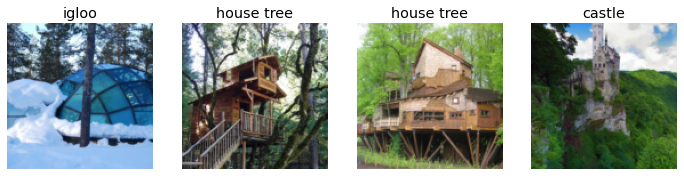

In [17]:
dls.valid.show_batch(max_n=4, nrows=1)

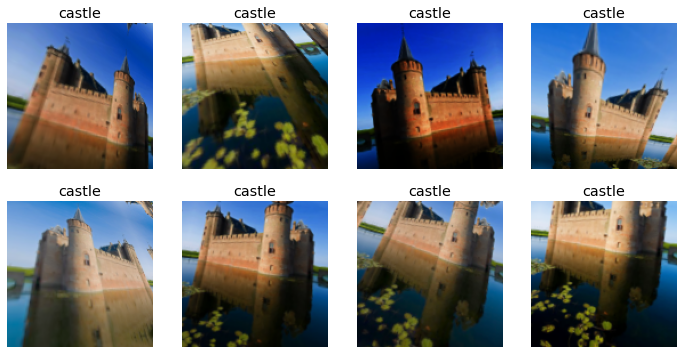

In [20]:
houses = houses.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = houses.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [21]:
houses = houses.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = houses.dataloaders(path)

In [22]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.781259,0.197733,0.089286,00:20


epoch,train_loss,valid_loss,error_rate,time
0,0.444953,0.096418,0.044643,00:21
1,0.326435,0.067784,0.017857,00:22
2,0.242552,0.061192,0.017857,00:21
3,0.186052,0.060080,0.017857,00:21


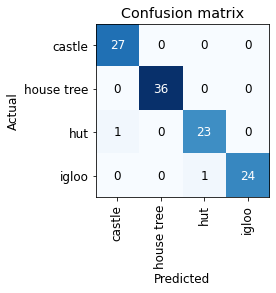

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

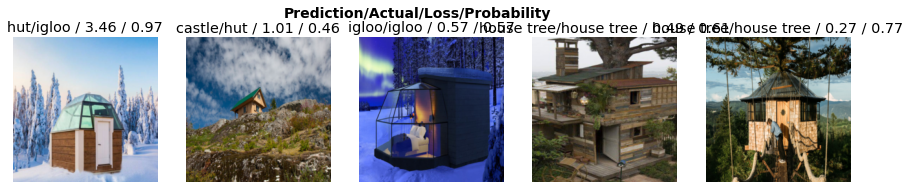

In [24]:
  interp.plot_top_losses(5, nrows=1)

In [44]:
learn.export()

In [26]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [27]:
learn_inf = load_learner(path/'export.pkl')

In [31]:
learn_inf.predict('houses/igloo/00000130.jpg')

('igloo', tensor(3), tensor([3.0633e-08, 1.9070e-10, 5.1840e-10, 1.0000e+00]))

In [32]:
learn_inf.dls.vocab

['castle', 'house tree', 'hut', 'igloo']

In [33]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [35]:
img = PILImage.create(btn_upload.data[-1])

In [36]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [37]:
pred,pred_idx,probs = learn_inf.predict(img)

In [38]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: castle; Probability: 0.9999')

In [39]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [40]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [41]:

btn_upload = widgets.FileUpload()

In [42]:
VBox([widgets.Label('Select your habitat!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [43]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

     |████████████████████████████████| 1.6MB 6.8MB/s 
     |████████████████████████████████| 122kB 50.9MB/s 
     |████████████████████████████████| 552kB 34.2MB/s 
     |████████████████████████████████| 378kB 26.7MB/s 
     |████████████████████████████████| 71kB 10.4MB/s 
ERROR: nbdev 1.1.14 has requirement nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
ERROR: jupyter-server 1.6.4 has requirement tornado>=6.1.0, but you'll have tornado 5.1.1 which is incompatible.
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
  Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1


Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
